<a href="https://colab.research.google.com/github/RajuMachupalli/Image_extract/blob/main/Table_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is to extract text from image

In [1]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("input_image.jpg")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Define a list to store subblocks containing tables
table_blocks = []

# Loop over each contour
for contour in contours:
    # Get bounding box coordinates of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Check if bounding box is of sufficient size and aspect ratio to be a table
    if w > 100 and h > 100 and w/h > 1.5:
        # Crop out the subblock containing the table and add it to the list
        table_blocks.append(img[y:y+h, x:x+w])

# Display the subblocks containing tables
for i, table_block in enumerate(table_blocks):
    cv2.imshow("Table Block " + str(i+1), table_block)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

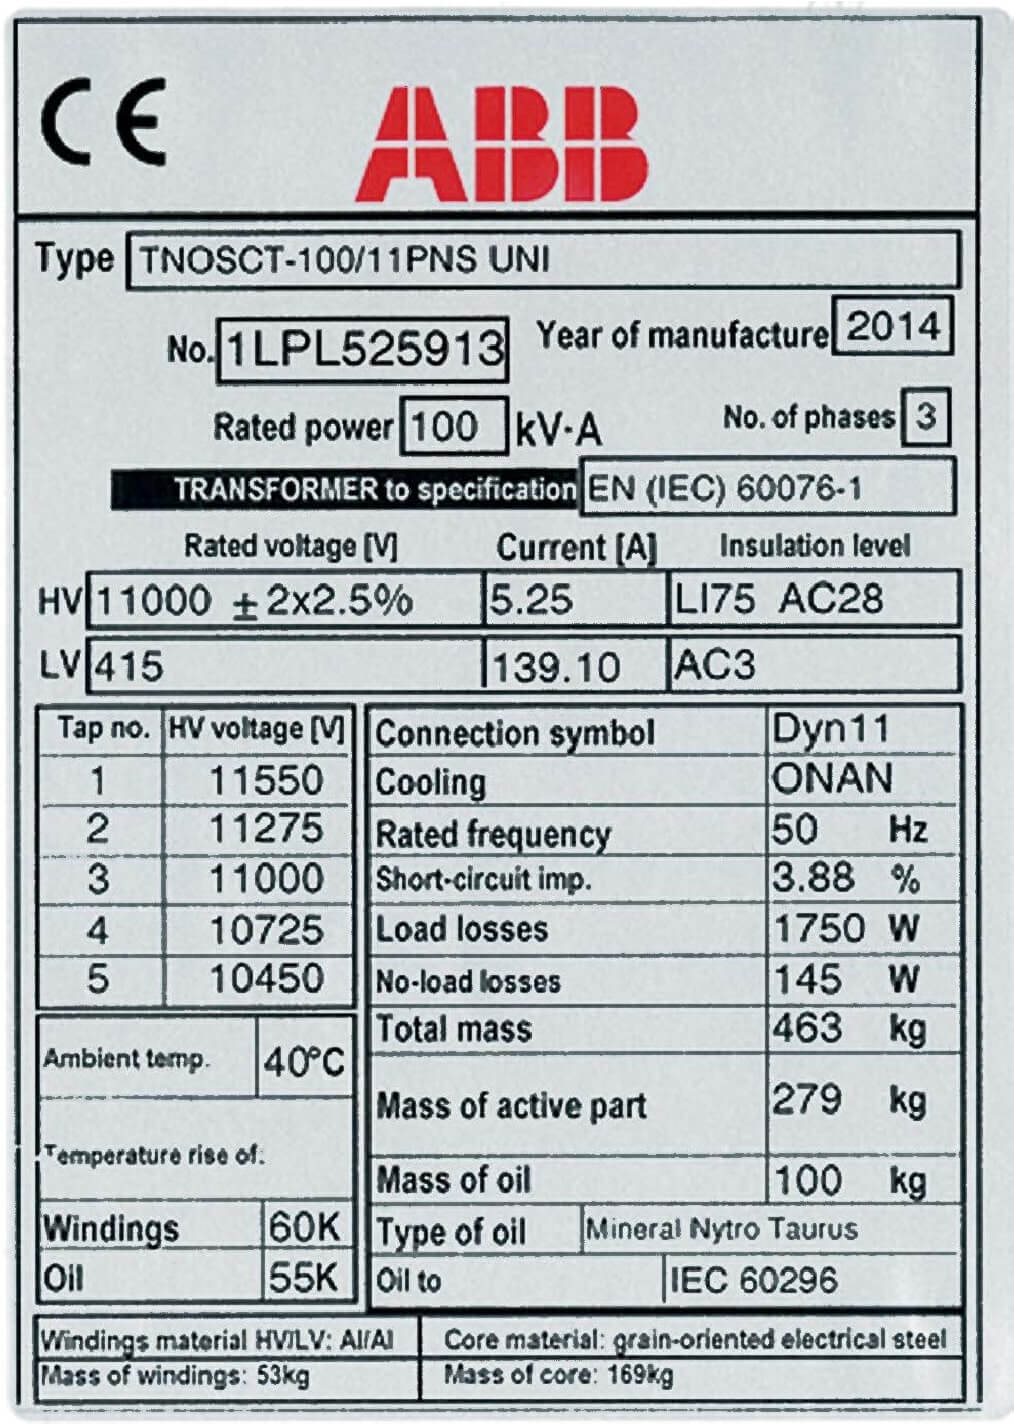